# 1. PCA 실습

### 1)  wine data를 불러오고 스케일링을 하세요.

In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

In [3]:
wine=load_wine()

In [4]:
wine_scaled=StandardScaler().fit_transform(wine.data)

### 2) 스케일링된 데이터에 주성분 수 7로 설정해서 PCA 데이터로 변환하고 개별 주성분이 차지하는 변동성 비율을 출력하세요

In [203]:
pca=PCA(n_components=7)
pca.fit(wine_scaled)
wine_pca=pca.transform(wine_scaled)
print(pca.explained_variance_ratio_)

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679]


### 3) 원본 와인 데이터세트와 PCA로 변환된 데이터 세트에 각각 분류를 적용한 후 결과를 출력하세요.
####    - 분류기는 RandomFoestClassifier를 사용하세요
####    - 교차 검증 폴드수 : 3
####    - 출력 결과는
       원본 데이터 평균 정확도 : [0.xxx,0.xxx,0.xxx]
       PCA 변환 데이터 평균 정확도 : [0.xxx,0.xxx,0.xxx]

In [204]:
rcf = RandomForestClassifier() 
scores = cross_val_score(rcf, wine.data, wine.target,scoring='accuracy',cv=3) 
print('원본 데이터 평균 정확도 : ', np.mean(scores))

pca_columns=['pca_component_1','pca_component_2','pca_component_3', 'pca_component_4', 'pca_component_5', 'pca_component_6', 'pca_component_7']
wineDF_pca = pd.DataFrame(wine_pca, columns=pca_columns) 
wineDF_pca['target']=wine.target
pca_X=wineDF_pca[['pca_component_1','pca_component_2','pca_component_3', 'pca_component_4', 'pca_component_5', 'pca_component_6', 'pca_component_7']]
scores_pca=cross_val_score(rcf,pca_X,wine.target,scoring='accuracy',cv=3)
print('PCA 변환 데이터 평균 정확도 : ', np.mean(scores_pca))

원본 데이터 평균 정확도 :  0.9493408662900188
PCA 변환 데이터 평균 정확도 :  0.9550847457627119


# 2. LDA 실습

### 1)     1번에서 스케일링한 와인 데이터를 컴포넌트 수를 2로 하여 lda변환 후 shape을 출력하세요.
    
    출력 결과 : (178,2)

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(wine_scaled, wine.target) 
wine_lda=lda.transform(wine_scaled)

print(wine_lda.shape)

(178, 2)


### 2) lda변환된 데이터 값을 2차원 평면에 class별로 표현하세요.
    
    colors와 markers는 밑에 제시했습니다.

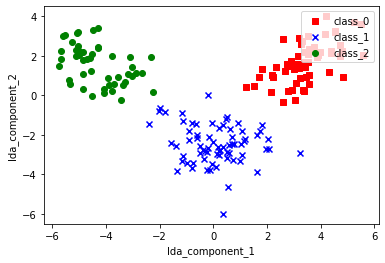

In [8]:
Ida_columns = ['lda_component_1', 'lda_component_2'] 
wineDF_lda = pd. DataFrame(wine_lda, columns=Ida_columns) 
wineDF_lda['target'] = wine.target 

markers = ['s', 'x', 'o'] 
colors=['r','b','g']
for i, (marker, color) in enumerate(zip(markers, colors)): 
    x_axis_data = wineDF_lda[wineDF_lda['target']==i]['lda_component_1'] 
    y_axis_data = wineDF_lda[wineDF_lda['target']==i]['lda_component_2'] 
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=wine.target_names[i], color=color) 

plt.legend(loc='upper right'); plt.xlabel('lda_component_1'); plt.ylabel('Ida_component_2') 
plt.show() 

# 3. SVD 실습 (추천 시스템)

## SVD는 추천시스템 중 '협업 필터링 Collaborative Filtering'기법에서 자주 사용되는 방식입니다. <br /> 다음의 과정에 따라서 데이터 전처리 및 SVD를 수행하고 추천결과를 확인해보세요 
     
**다음의 자료에서 많은 도움을 얻었습니다**     
https://lsjsj92.tistory.com/569?category=853217
     
3.1. 원자료를 불러온다     

    1) movies.csv를 데이터프레임으로 불러와서 raw_movies_df라고 저장한다     
    2) ratings.csv를 데이터프레임으로 불러와서 raw_ratings_df라고 저장한다  
    3) raw_ratings_df를 이용하여 피벗된 객체 user_movie_rating_df를 생성한다.     
    index는 userId, column은 movieId, value는 rating으로 한다
    4) user_movie_rating_df의 결측값들을 모두 0으로 변환한다

In [24]:
raw_movies_df=pd.read_csv("./movies.csv")
raw_ratings_df=pd.read_csv("./ratings.csv")
raw_ratings_df.head()

user_movie_rating_df=raw_ratings_df.pivot_table('rating',index='userId',columns='movieId').fillna(0)
user_movie_rating_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


3.2. 데이터프레임안의 값들을 X로 추출하여서 표준화를 실시한다
- 표준화는 각 데이터를 데이터가 속한 행의 평균값에서 빼는 방식으로 진행한다 (sklearn의 StandardScaler를 사용하는 것이 아님)
- 표준화된 X를 **X_scaled**라고 저장한다

In [179]:
X=user_movie_rating_df.values
X -= np.mean(X, axis=0)
X=pd.DataFrame(data=X)
X_scaled=X.values.T

3.3. X_scaled를 바탕으로 TruncatedSVD를 시행하여 사용자 평점 예측 객체를 생성한다.
- sklearn 모듈을 사용하지 않고 from scipy.sparse.linalg import svds를 사용합니다
- 사용방법은 인자로 Truncated SVD를 수행하고자 하는 행렬을 첫번째로,
- 두번째 인자에는 최종 압축되어 산출되는 열의 개수 k를 입력합니다.    
<br />
ex) U, sigma, Vt = svds(?, k = 12)<br />
-> k = 12로 설정    
- 생성된 Truncated SVD객체를 **svd_preds_df**라고 저장한다    
-> columns는 user_movie_rating_df.columns로 설정



In [180]:
from scipy.sparse.linalg import svds

U, Sigma, Vt=svds(X_scaled,k=12)
svd_preds_df=np.dot(np.dot(U, np.diag(Sigma)),Vt)
print(svd_preds_df.shape)

(9066, 671)


3.4. 아래에서 제시되는 사용자 정의함수를 이용하여 **user_id = 330**인 고객에게 5개의 영화를 추천해보는 알고리즘을 수행해보세요!

- 인자의 등장순서는 

    1) Truncated SVD를 통해 구해진 svd_preds_df    
    2) 예측하고자 하는 user_id, 번호    
    3) 원래 가지고 있는 영화들의 목록을 담은 raw_movies_df    
    4) 원래 가지고 있는 유저별 영화의 평점 데이터 raw_ratings_df    
    5) 해당 유저에게 추천해주고자 하는 영화의 개수   

In [190]:
corr=np.corrcoef(svd_preds_df)
corr.shape

temp=raw_movies_df["title"]
movie_titles=list(temp)

In [158]:
#생성된 유저의 이전 평점 기록
temp=raw_ratings_df.loc[raw_ratings_df['userId'] == 330]
user_history=pd.merge(temp, raw_movies_df, left_on='movieId', right_on='movieId', how='inner')
user_history = user_history.sort_values('rating',ascending=False)
user_history.head(5)

,userId,movieId,rating,timestamp,title,genres
47,330,1094,5.0,948577200,"Crying Game, The (1992)",Drama|Romance|Thriller
14,330,213,5.0,948577039,Burnt by the Sun (Utomlyonnye solntsem) (1994),Drama
34,330,527,5.0,948577164,Schindler's List (1993),Drama|War
45,330,1035,5.0,948574126,"Sound of Music, The (1965)",Musical|Romance
48,330,1172,5.0,948575236,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama


In [206]:
indx=movie_titles.index("Crying Game, The (1992)")
corr_first=corr[indx]
movie_titles[(corr_first>=0.9)]
#오류 length not matching

In [27]:
#예측된 유저의 영화추천 목록
recommendations.head(5)

,movieId,title,genres,Predictions
246,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,2.023774
294,356,Forrest Gump (1994),Comedy|Drama|Romance|War,1.736524
497,608,Fargo (1996),Comedy|Crime|Drama|Thriller,1.489821
487,590,Dances with Wolves (1990),Adventure|Drama|Western,1.472671
316,380,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller,1.240356
